In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from dropout_defense import Dropout_defense
import utils
import matplotlib.pyplot as plt
import numpy as np
import torch

# MNIST

#### Initialize an object of class Dropout_defense.
It takes a few minutes to load the data.

In [4]:
mnist = Dropout_defense(dataset='mnist', num_examples=1000)


Loading data...
  | 0 1 2 3 4 5 6 7 8 9
-----------------------
0 |   1 1 1 1 1 1 1 1 1 
1 | 1   1 1 1 1 1 1 1 1 
2 | 1 1   1 1 1 1 1 1 1 
3 | 1 1 1   1 1 1 1 1 1 
4 | 1 1 1 1   1 1 1 1 1 
5 | 1 1 1 1 1   1 1 1 1 
6 | 1 1 1 1 1 1   1 1 1 
7 | 1 1 1 1 1 1 1   1 1 
8 | 1 1 1 1 1 1 1 1   1 
9 | 1 1 1 1 1 1 1 1 1   
Data loaded. Took 252.5 seconds.


#### Visualize ensemble of forward passes

In [ ]:
mnist.visualize(dropout_prob=0.1,
                original_label=8,
                target_label=4,
                ensemble_size=50,
                type='prediction',
                num_to_plot=10)


# Plot heatmap of filtered predictions
For each example, we compute several forward passes with dropout enabled. We then predict to the class that receives the plurality of predictions from this ensemble of forward passes. We compute these predictions for all examples of each (original_label, target_label) pair and compute the fraction of adversarial images that this method successfully thwarts. We also compute the percentage of adversarial images that still fool the model with this defense strategy employed. The heatmaps below summarize the above statistics for each (original_label, target_label) pair.

  | 0 1 2 3 4 5 6 7 8 9
-----------------------
0 |   1 1 1 1 1 1 1 1 1 
1 | 1   1 1 1 1 1 1 1 1 
2 | 1 1   1 1 1 1 1 1 1 
3 | 1 1 1   1 1 1 1 1 1 
4 | 1 1 1 1   1 1 1 1 1 
5 | 1 1 1 1 1   1 1 1 1 
6 | 1 1 1 1 1 1   1 1 1 
7 | 1 1 1 1 1 1 1   1 1 
8 | 1 1 1 1 1 1 1 1   1 
9 | 1 1 1 1 1 1 1 1 1   
Took 40.24 minutes


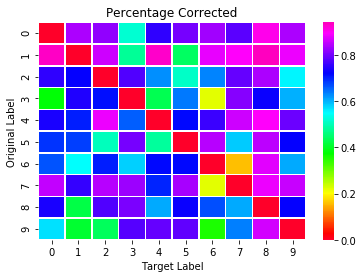

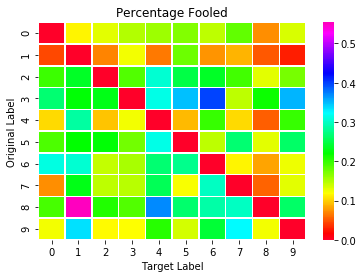

In [14]:
mnist.filter_heatmap(dropout_prob=0.1,ensemble_size=50)


In [18]:
# mnist.fooled_array
# np.save('sadfasdf', mnist.sdf)


  | 0 1 2 3 4 5 6 7 8 9
-----------------------
0 |   1 1 1 1 1 1 1 1 1 
1 | 1   1 1 1 1 1 1 1 1 
2 | 1 1   1 1 1 1 1 1 1 
3 | 1 1 1   1 1 1 1 1 1 
4 | 1 1 1 1   1 1 1 1 1 
5 | 1 1 1 1 1   1 1 1 1 
6 | 1 1 1 1 1 1   1 1 1 
7 | 1 1 1 1 1 1 1   1 1 
8 | 1 1 1 1 1 1 1 1   1 
9 | 1 1 1 1 1 1 1 1 1   
Took 86.21 minutes


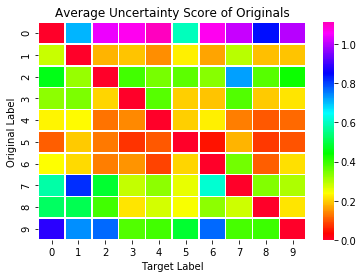

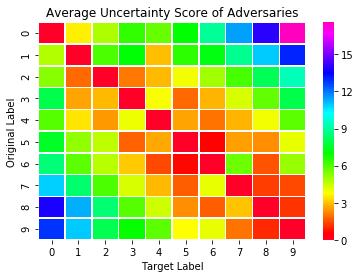

In [19]:
mnist.uncertainty_heatmap(dropout_prob=0.1, ensemble_size=50, method='variance')


In [42]:
# a, b = mnist.corrected_array, mnist.fooled_array

a, b = mnist.orig_score_array, mnist.adv_score_array

In [43]:
a

array([[ 0.        ,  0.71149804,  1.04286634,  1.06999648,  1.11109486,
         0.5949364 ,  1.07063739,  1.01492381,  0.84494298,  1.00017158],
       [ 0.28370968,  0.        ,  0.1795216 ,  0.1916336 ,  0.1495836 ,
         0.2268604 ,  0.1669744 ,  0.29933463,  0.1893584 ,  0.1936892 ],
       [ 0.46097872,  0.32282051,  0.        ,  0.393016  ,  0.34727246,
         0.3706512 ,  0.33646635,  0.72545781,  0.3762372 ,  0.4348868 ],
       [ 0.33410196,  0.34463478,  0.2057736 ,  0.        ,  0.37452436,
         0.202786  ,  0.19139115,  0.37964669,  0.1966688 ,  0.2210664 ],
       [ 0.23410954,  0.23505729,  0.12700927,  0.14672235,  0.        ,
         0.19990698,  0.22720157,  0.136268  ,  0.1045048 ,  0.1204248 ],
       [ 0.1127494 ,  0.19644052,  0.13271347,  0.0775692 ,  0.10638534,
         0.        ,  0.0499888 ,  0.18073469,  0.0817136 ,  0.1024068 ],
       [ 0.2425636 ,  0.20885996,  0.1386648 ,  0.15581219,  0.088118  ,
         0.2075349 ,  0.        ,  0.35285057

In [44]:
b

array([[  0.        ,   3.58469244,   4.85606238,   6.41337846,
          5.76203429,   7.028324  ,   8.93578076,  11.53011429,
         14.0395473 ,  17.58366284],
       [  4.76550887,   0.        ,   6.0745456 ,   7.1168668 ,
          3.0221804 ,   6.4835344 ,   7.2702756 ,   8.86689721,
         10.94686   ,  13.0690184 ],
       [  5.29579461,   1.87952023,   0.        ,   2.0805524 ,
          2.94873969,   3.9644484 ,   4.99122682,   6.1416349 ,
          8.1272312 ,   9.3953956 ],
       [  8.03316601,   2.65794658,   2.8948812 ,   0.        ,
          3.88395321,   1.9046908 ,   2.82525735,   4.31314813,
          5.819398  ,   8.0253572 ],
       [  5.93155077,   3.46343939,   2.49551921,   3.99860948,
          0.        ,   2.66094835,   2.00737546,   2.8594504 ,
          3.9529544 ,   5.8788872 ],
       [  7.53490024,   5.20312416,   4.61845714,   1.7956276 ,
          2.73349233,   0.        ,   0.5877272 ,   2.56578367,
          2.38291   ,   4.0709308 ],
       [  

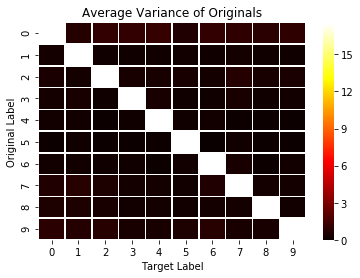

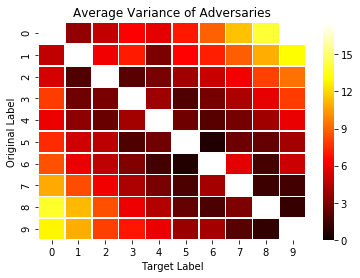

In [46]:
import seaborn

_min = max(a.min(), b.min())
_max = max(a.max(), b.max())

seaborn.heatmap(a, linewidth=0.5, cmap='hot', vmin=_min, vmax=_max, mask=np.eye(10,10))
# plt.title('Percentage Corrected')
plt.title('Average Variance of Originals')
plt.xlabel('Target Label')
plt.ylabel('Original Label')
plt.show()

seaborn.heatmap(b, linewidth=0.5, cmap='hot', vmin=_min, vmax=_max, mask=np.eye(10,10))
# plt.title('Percentage Fooled')
plt.title('Average Variance of Adversaries')
plt.xlabel('Target Label')
plt.ylabel('Original Label')
plt.show()



# CIFAR

#### Initialize an object of class Dropout_defense.
It takes a few minutes to load the data.

In [47]:
cifar = Dropout_defense(dataset='cifar', num_examples=1000)


Loading data...
  | 0 1 2 3 4 5 6 7 8 9
-----------------------
0 |   1 1 1 1 1 1 1 1 1 
1 | 1   1 1 1 1 1 1 1 1 
2 | 1 1   1 1 1 1 1 1 1 
3 | 1 1 1   1 1 1 1 1 1 
4 | 1 1 1 1   1 1 1 1 1 
5 | 1 1 1 1 1   1 1 1 1 
6 | 1 1 1 1 1 1   1 1 1 
7 | 1 1 1 1 1 1 1   1 1 
8 | 1 1 1 1 1 1 1 1   1 
9 | 1 1 1 1 1 1 1 1 1   
Data loaded. Took 105.0 seconds.


#### Visualize ensemble of forward passes

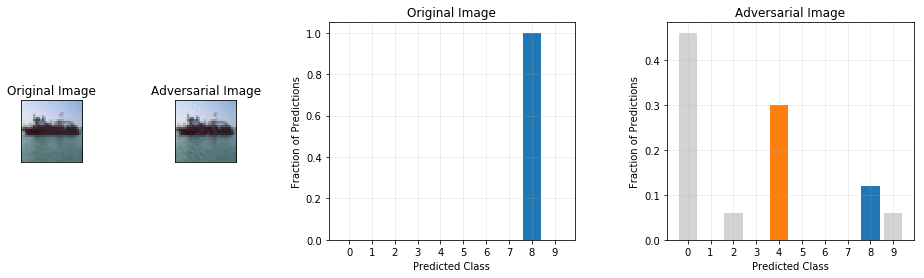

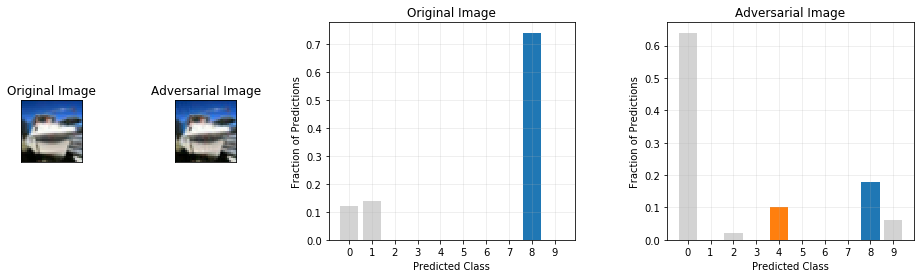

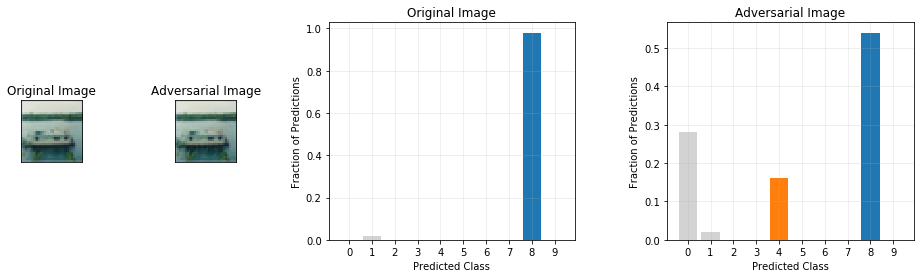

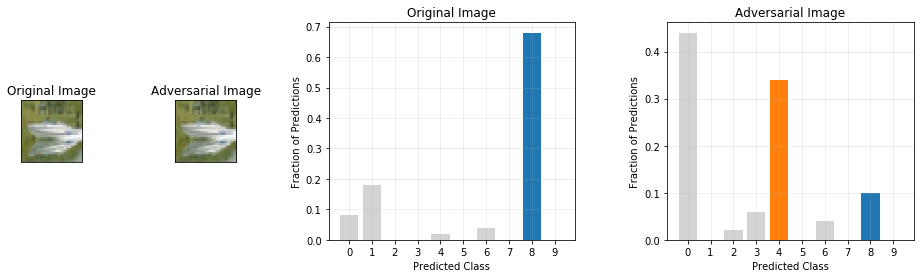

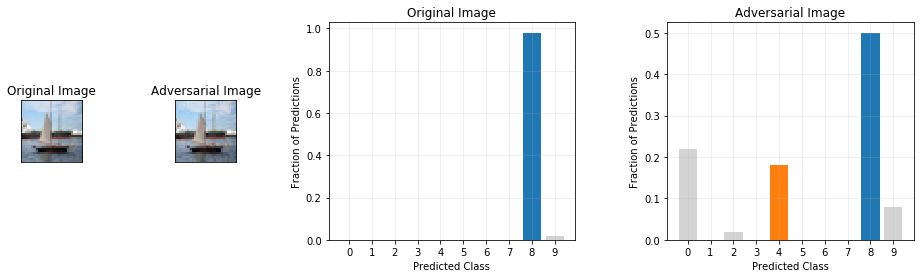

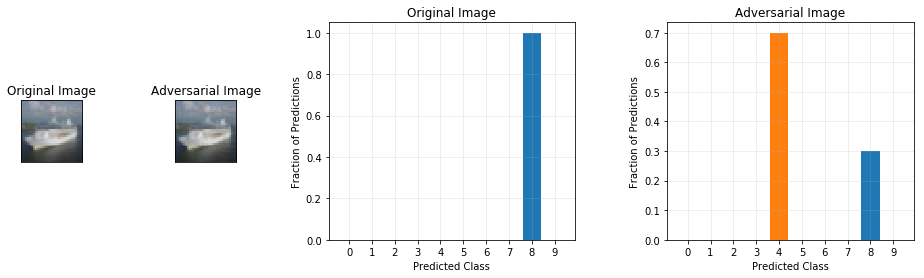

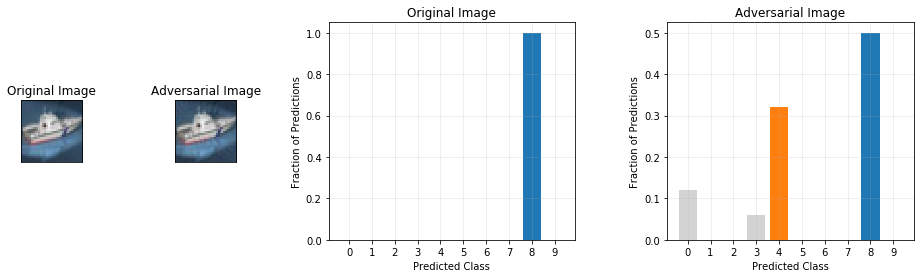

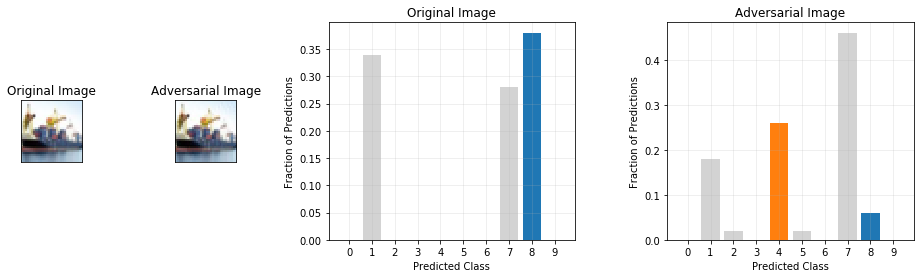

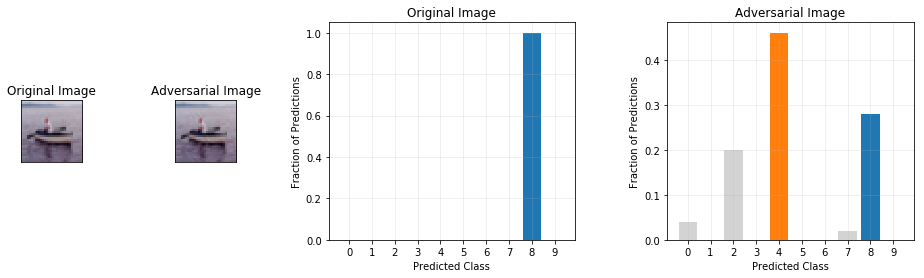

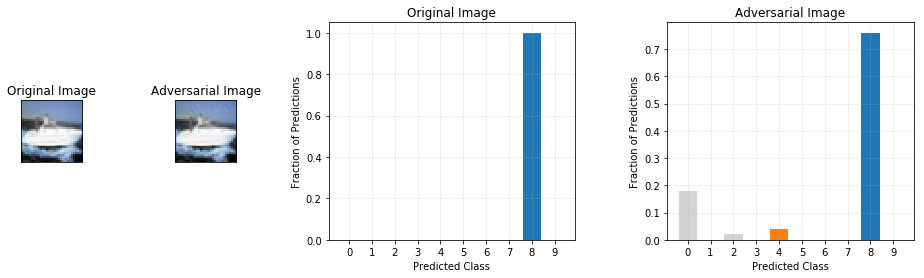

In [48]:
cifar.visualize(dropout_prob=0.1,
                original_label=8,
                target_label=4,
                ensemble_size=50,
                type='prediction',
                num_to_plot=10)


# Plot heatmap of filtered predictions
For each example, we compute several forward passes with dropout enabled. We then predict to the class that receives the plurality of predictions from this ensemble of forward passes. We compute these predictions for all examples of each (original_label, target_label) pair and compute the fraction of adversarial images that this method successfully thwarts. We also compute the percentage of adversarial images that still fool the model with this defense strategy employed. The heatmaps below summarize the above statistics for each (original_label, target_label) pair.

  | 0 1 2 3 4 5 6 7 8 9
-----------------------
0 |   1 1 1 1 1 1 1 1 1 
1 | 1   1 1 1 1 1 1 1 1 
2 | 1 1   1 1 1 1 1 1 1 
3 | 1 1 1   1 1 1 1 1 1 
4 | 1 1 1 1   1 1 1 1 1 
5 | 1 1 1 1 1   1 1 1 1 
6 | 1 1 1 1 1 1   1 1 1 
7 | 1 1 1 1 1 1 1   1 1 
8 | 1 1 1 1 1 1 1 1   1 
9 | 1 1 1 1 1 1 1 1 1   
Took 32.33 minutes


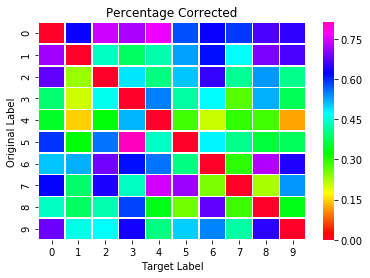

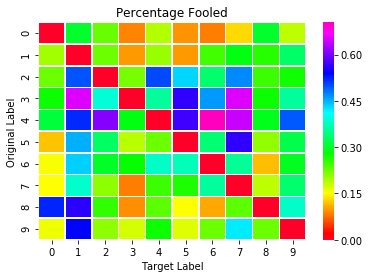

In [49]:
cifar.filter_heatmap(dropout_prob=0.1,ensemble_size=50)


In [66]:
a, b = cifar.corrected_array, cifar.fooled_array

In [69]:
np.save('cifar_fooled_drop0.1_num_50', b)

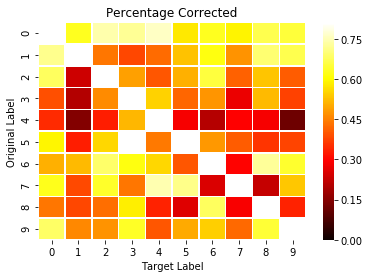

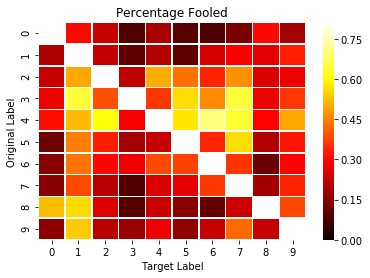

In [67]:
import seaborn

_min = max(a.min(), b.min())
_max = max(a.max(), b.max())

seaborn.heatmap(a, linewidth=0.5, cmap='hot', vmin=_min, vmax=_max, mask=np.eye(10,10))
plt.title('Percentage Corrected')
# plt.title('Average Variance of Originals')
plt.xlabel('Target Label')
plt.ylabel('Original Label')
plt.show()

seaborn.heatmap(b, linewidth=0.5, cmap='hot', vmin=_min, vmax=_max, mask=np.eye(10,10))
plt.title('Percentage Fooled')
# plt.title('Average Variance of Adversaries')
plt.xlabel('Target Label')
plt.ylabel('Original Label')
plt.show()


  | 0 1 2 3 4 5 6 7 8 9
-----------------------
0 |   1 1 1 1 1 1 1 1 1 
1 | 1   1 1 1 1 1 1 1 1 
2 | 1 1   1 1 1 1 1 1 1 
3 | 1 1 1   1 1 1 1 1 1 
4 | 1 1 1 1   1 1 1 1 1 
5 | 1 1 1 1 1   1 1 1 1 
6 | 1 1 1 1 1 1   1 1 1 
7 | 1 1 1 1 1 1 1   1 1 
8 | 1 1 1 1 1 1 1 1   1 
9 | 1 1 1 1 1 1 1 1 1   
Took 50.91 minutes


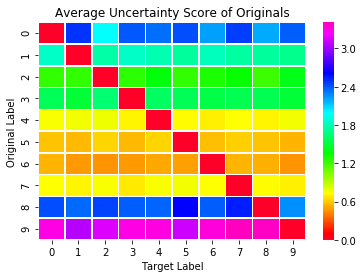

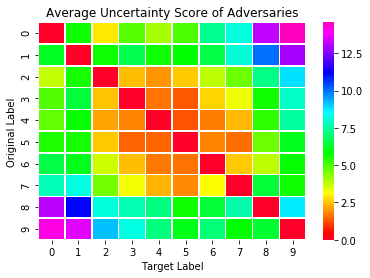

In [55]:
cifar.uncertainty_heatmap(dropout_prob=0.1, ensemble_size=50, method='variance')


In [70]:
a, b = cifar.orig_score_array, cifar.adv_score_array

In [71]:
np.save('cifar_variance_adv_drop0.1_num50', b)


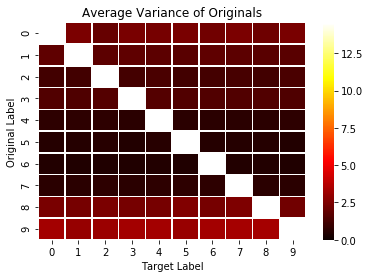

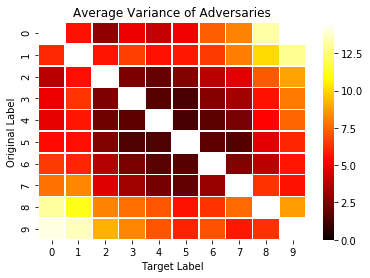

In [73]:
import seaborn

_min = max(a.min(), b.min())
_max = max(a.max(), b.max())

seaborn.heatmap(a, linewidth=0.5, cmap='hot', vmin=_min, vmax=_max, mask=np.eye(10,10))
# plt.title('Percentage Corrected')
plt.title('Average Variance of Originals')
plt.xlabel('Target Label')
plt.ylabel('Original Label')
plt.show()

seaborn.heatmap(b, linewidth=0.5, cmap='hot', vmin=_min, vmax=_max, mask=np.eye(10,10))
# plt.title('Percentage Fooled')
plt.title('Average Variance of Adversaries')
plt.xlabel('Target Label')
plt.ylabel('Original Label')
plt.show()
